## V44 X-ray reflectrometry

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from scipy.signal import find_peaks as peaks
import uncertainties.unumpy as unp
import uncertainties.umath as um
from uncertainties.unumpy import uarray as uar, nominal_values as noms, std_devs as stds
from uncertainties import ufloat as u

### Detector-Scan

$$G(x; a, b, \mu, \sigma) \equiv a e^{-(x - \mu)^2 / 2\sigma^2} + b$$

[1.006417700358727+/-0.010164108667253082
 0.014197507905308729+/-0.0023675643325001337
 0.007441455599657689+/-0.000442657237954838
 0.038483857043642385+/-0.00046080102255544004]


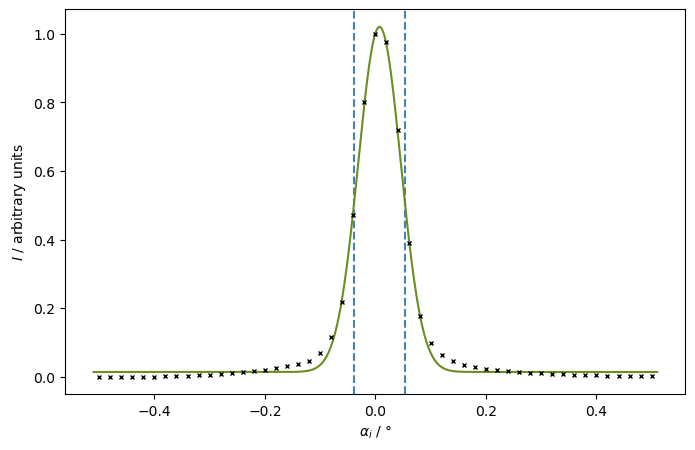

MAX: 1.021+/-0.010
FWHM: [0.05275273458789498+/-0.000700219839359264, -0.037869823388579596+/-0.000700219839359264]


In [2]:
ang, I = np.genfromtxt('data/Detectorscan.UXD', unpack=True, skip_header=56)
I = I / np.max(I)

def gauss(x, a, b, m, s):
    return a * np.e**(- (x - m)**2 / (2 * s**2)) + b

par, cov = fit(gauss, ang, I, p0=[1.0, 0.0, 0.0, 0.1])
err = np.sqrt(np.diag(cov))

upar = uar(par, err)

print(upar)

x = np.linspace(-0.51, 0.51, 1000)

plt.figure(figsize=(8, 5))

fwhm = [upar[2] + np.sqrt(2 * np.log(2)) * upar[3], upar[2] - np.sqrt(2 * np.log(2)) * upar[3]]

plt.axvline(fwhm[0].n, linestyle='--', color='steelblue')
plt.axvline(fwhm[1].n, linestyle='--', color='steelblue')
plt.plot(x, gauss(x, *noms(upar)), color='olivedrab')
plt.plot(ang, I, 'kx', ms=3.21)

plt.xlabel(r'$\alpha_i$ / °')
plt.ylabel(r'$I$ / arbitrary units')

plt.show()
plt.close()

print(f'MAX: {gauss(upar[2], *upar)}')
print(f'FWHM: {fwhm}')

### Z-Scan

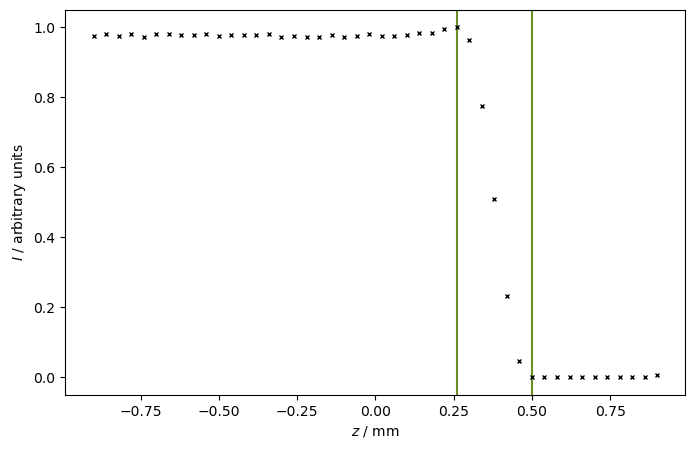

d = 0.24+/-0.06 mm


In [3]:
z, I = np.genfromtxt('data/Z-Scan-09to09v1.UXD', unpack=True, skip_header=56)
I = I / np.max(I)

plt.figure(figsize=(8, 5))

z1 = u(z[-17], z[1] - z[0])
z2 = u(z[-11], z[1] - z[0])

plt.axvline(z1.n, color='olivedrab')
plt.axvline(z2.n, color='olivedrab')
plt.plot(z, I, 'kx', ms=3.21)

plt.xlabel(r'$z$ / mm')
plt.ylabel(r'$I$ / arbitrary units')

plt.show()
plt.close()

d = z2 - z1

print(f'd = {d} mm')

### X-Scan

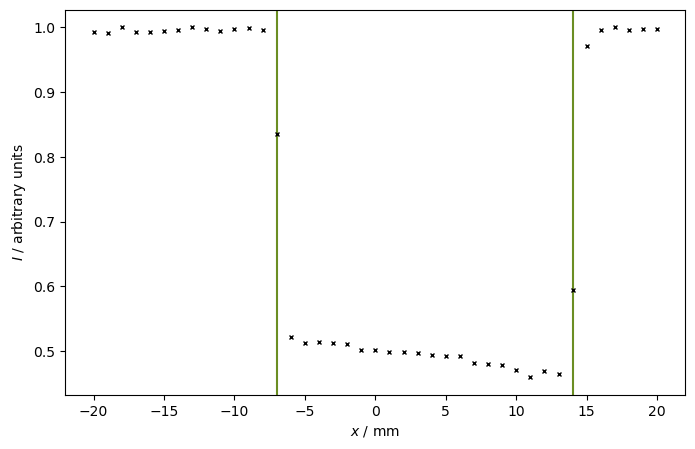

D = 21.0+/-2.8 mm (assuming square shape)


In [4]:
x, I = np.genfromtxt('data/X-Scan-20to20v1.UXD', unpack=True, skip_header=56)
I = I / np.max(I)

plt.figure(figsize=(8, 5))

x1 = u(x[13], x[2] - x[0])
x2 = u(x[-7], x[2] - x[0])

plt.axvline(x1.n, color='olivedrab')
plt.axvline(x2.n, color='olivedrab')

plt.plot(x, I, 'kx', ms=3.21)

plt.xlabel(r'$x$ / mm')
plt.ylabel(r'$I$ / arbitrary units')

plt.show()
plt.close()

D = x2 - x1

print(f'D = {D} mm (assuming square shape)')

### Rocking-Curve

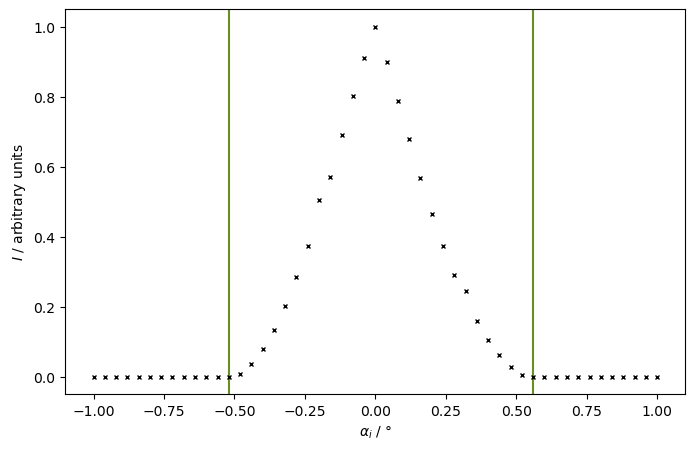

Geometry Angle
Exp.: 0.540+/-0.028 °
Theo.: 0.65+/-0.18 ° (exact) 0.65+/-0.18 ° (approximated)


In [5]:
ang, I = np.genfromtxt('data/Rocking-Scan-1to1v1.UXD', unpack=True, skip_header=56)
I = I / np.max(I)

plt.figure(figsize=(8, 5))

ang1 = u(ang[12], ang[1] - ang[0])
ang2 = u(ang[-12], ang[1] - ang[0])

plt.axvline(ang1.n, color='olivedrab')
plt.axvline(ang2.n, color='olivedrab')

plt.plot(ang, I, 'kx', ms=3.21)

plt.xlabel(r'$\alpha_i$ / °')
plt.ylabel(r'$I$ / arbitrary units')

plt.show()
plt.close()

ang_exp = (ang2 - ang1) / 2
ang_theo_exact = um.asin(d / D) * 180 / np.pi
ang_theo_approx = d / D * 180 / np.pi

print('Geometry Angle')
print(f'Exp.: {ang_exp} °')
print(f'Theo.: {ang_theo_exact} ° (exact) {ang_theo_approx} ° (approximated)')